In [56]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import VarGamma as vg
import matplotlib.pyplot as plt
#import time

class randomBinary(object):
    """This is my own class that will generate various random binary events.
    I still need to tweak it a bit to be more realistic, but if we are willing
    to assume that these markets are not efficient, and rather that they are a
    reflection of a bunch of people, with low levels of information, who really 
    just love to gamble on pretty unpredictable events we can maybe draw some
    interesting conclusions. Fixing the distributions to be more realistic
    is obviously a good next step, but this will allow me to focus on agents for
    a bit.
    """
    
    def __init__(self):
        #self.start = time.clock()
        self.prices, self.pricesNO = [], []
        #self.offers, self.offersNO = {}, {}
        
        # This tests the offer timing system. I will deprecate it later.
        #for i in np.arange(1,100,1):
        #    timestamp = np.int((time.clock()-self.start) * 10**6)
        #    self.offers[i] = (timestamp,'TestGambler',np.random.randint(-100,100))
        #    self.offers_no[i] = (timestamp,'TestGambler',0)
        
    def genVarGamma_beta(self, alpha, beta, mu, sigma, theta, nu, plot=False):
        """Generates 100 random variables that are variance gamma distriuted and
        then filtered through a beta distribution for scaling.
        
        ***THIS SEEMS TO WORK***
        """
        
        t = np.arange(0,1,step=.01)
        self.prices = [np.random.binomial(1,.5)]   
        
        signal = vg.rnd(100, mu, sigma, theta, nu)
        res = stats.betai(alpha, beta, np.abs(signal))
        
        for i in res:
            self.prices.append(i)
            
        self.prices = list(reversed(self.prices))
        self.prices = np.around(self.prices,decimals=2)
        self.prices_no = [abs(1-x) for x in self.prices]
        self.prices_no = np.around(self.prices_no,decimals=2)
        
        if plot == True:
            plt.plot(self.prices)
    
    def genABM_beta(self, alpha, beta, mu, sigma, plot=False):
        """This function produces a time-series based on Arithmetic Brownian
        Motion (ABM), filtered through a beta distribution for scaling.
        
        ***THIS NEEDS WORK***
        """

        t = np.arange(0,1,step=.01)
        self.prices = [np.random.binomial(1,.5)]
        Wt = np.cumsum(np.random.randn(100))
        
        signal = self.prices[0] + ((mu-sigma**2/2)*t + sigma*Wt)
        res = stats.betai(alpha, beta, abs(signal/max(signal)))
        
        for i in res:
            self.prices.append(i)
                
        self.prices = list(reversed(self.prices))
        self.prices = np.around(self.prices,decimals=2)
        self.prices_no = [abs(1-x) for x in self.prices]
        self.prices_no = np.around(self.prices_no,decimals=2)
    
        if plot == True:
            plt.plot(self.prices)
            
    def genABM(self, mu, sigma, plot=False):
        """This function produces a time-series based on Arithmetic Brownian
        Motion (ABM), filtered through a logit distribution for scaling.
        
        ***THIS NEEDS WORK***
        """
        
        t = np.arange(0,1,step=.01)
        self.prices = [np.random.binomial(1,.5)]
        Wt = np.cumsum(np.random.randn(100))
        
        signal = self.prices[0] + ((mu-sigma**2/2)*t + sigma*Wt)
        res = [(i-min(signal))/(max(signal)-min(signal)) for i in signal]
        
        for i in res:
            self.prices.append(i)

        self.prices = list(reversed(self.prices))
        self.prices = np.around(self.prices,decimals=2)
        self.prices_no = [abs(1-x) for x in self.prices]
        self.prices_no = np.around(self.prices_no,decimals=2)
        
        if plot == True:
            plt.plot(self.prices)
            
    def genGBM(self, alpha, beta, mu, sigma):
        """This function produces a time-series based on Geometric Brownian
        Motion (GBM), filtered through a beta distribution for scaling.
        ***THIS NEEDS WORK***
        """
        
        self.prices = [np.random.binomial(1,.5)]
        t = np.arange(0,1,step=.01)
        S0 = np.random.random()
        Wt = np.cumsum(np.random.randn(100))
        
        signal = S0 * np.exp((mu-sigma**2/2)*t + sigma*Wt)
        res = stats.betai(alpha, beta, abs(signal/max(signal)))
        
        for i in res:
            self.prices.append(i)

        self.prices = list(reversed(self.prices))
        self.prices = np.around(self.prices,decimals=2)
        self.prices_no = [abs(1-x) for x in self.prices]
        self.prices_no = np.around(self.prices_no,decimals=2)

In [57]:
testEvent = randomBinary()

[ 0.21  0.11  0.23  0.18  0.22  0.3   0.08  0.18  0.25  0.12  0.12  0.3
  0.16  0.13  0.19  0.23  0.2   0.24  0.19  0.14  0.13  0.22  0.14  0.25
  0.18  0.31  0.07  0.07  0.1   0.3   0.21  0.31  0.31  0.09  0.23  0.37
  0.21  0.24  0.27  0.22  0.21  0.34  0.28  0.18  0.22  0.22  0.14  0.27
  0.26  0.34  0.16  0.25  0.24  0.32  0.25  0.22  0.19  0.19  0.09  0.06
  0.15  0.33  0.14  0.16  0.25  0.16  0.25  0.3   0.18  0.18  0.29  0.26
  0.23  0.18  0.13  0.07  0.31  0.17  0.26  0.31  0.1   0.21  0.07  0.22
  0.34  0.27  0.23  0.23  0.07  0.2   0.33  0.17  0.13  0.24  0.23  0.2
  0.25  0.18  0.12  0.24  0.  ]


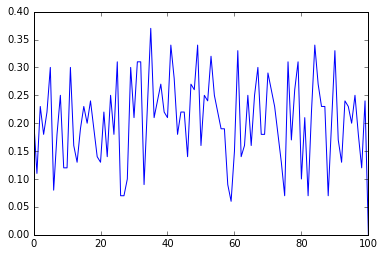

In [58]:
testEvent.genVarGamma_beta(0.5, 0.5, 0, 0.1, 0.1, 0.1, plot=True)
print testEvent.prices

[ 0.74  0.71  0.79  0.79  0.79  0.78  0.69  0.67  0.68  0.68  0.74  0.8
  0.81  0.67  0.71  0.66  0.76  0.74  0.64  0.6   0.54  0.58  0.63  0.63
  0.65  0.71  0.69  0.72  0.72  0.73  0.72  0.74  0.82  0.83  0.83  0.78
  0.92  1.    0.87  0.85  0.84  0.8   0.79  0.72  0.77  0.81  0.83  0.75
  0.7   0.7   0.67  0.77  0.77  0.76  0.77  0.69  0.69  0.6   0.57  0.58
  0.62  0.56  0.56  0.54  0.53  0.49  0.45  0.44  0.33  0.33  0.39  0.4
  0.34  0.31  0.3   0.31  0.35  0.32  0.29  0.27  0.48  0.45  0.54  0.5
  0.46  0.47  0.41  0.41  0.42  0.31  0.26  0.27  0.21  0.15  0.1   0.08
  0.    0.    0.03  0.07  0.  ]


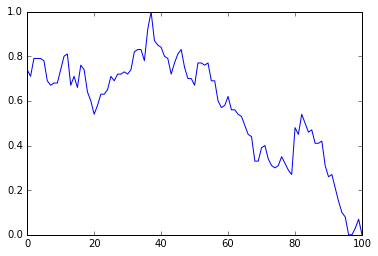

In [62]:
testEvent.genABM(0, 1, plot=True)
print testEvent.prices